<a href="https://colab.research.google.com/github/Interpause/pseudo-text/blob/master/Plan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A Semi-Supervised approach to gathering relevant credible evidence to use in Automated Fact Checking (AFC)

![alt text](https://i.imgur.com/dKSd6YN.png)

# Claims Datasets
Note: evidence gathering is completely unsupervised. These datasets come with evidence but they will be used to train the control model only.

## FEVER
http://fever.ai<br>
Dataset of claim, sentences that are relevant to it, and whether support, refute or not enough info. Goal of challenge is optimize finding evidence sentences from wikipedia then checking the claim using them. Score is only given for correct evidence found (within set of 5). Challenge essentially matches what I am doing except for some [key differences](#fever_differences).

##SQuAD
https://rajpurkar.github.io/SQuAD-explorer<br>
The famous question-answer dataset. By modifying it slightly, it can be used to pretrain the classifier to accept the raw article rather than sentences, and it can be modified into a claim checking dataset by converting the questions to statements.

## CREDBANK
https://github.com/compsocial/CREDBANK-data<br>
While still human-annotated, it is decidedly the noisiest. Unfortunately, the only evidence given is one-liners by the annotator. Which is why this dataset will be used last, relying solely on the approach's ability to gather evidence, to turn this into a regression problem. Might end up reducing performance based on annotation quality though.

# Evidence Source Datasets
Note: These are pre-gathered. I have no idea yet how to consistently test the online performance of this since scrapers are influenced by many variables. Will be used as the source for the finder for now.

## 12K self-gathered dataset
See [Google Drive](https://drive.google.com/open?id=14lUCkZWvt50nt19Mxx2C1BKOeMV-XXdX). Shows conceptually at least how the approach might actively scrap news articles. I will try utilize Google's Custom Search API next. Contains URL, category, outlet, text, title and metadata.

## All the News
https://components.one/datasets/all-the-news-articles-dataset/<br>
204K samples, a lot of them are barely useable though.

## News Aggregator Dataset
https://www.kaggle.com/uciml/news-aggregator-dataset<br>
Has 423k samples, except its only the headlines and category. However, if my scrapping efforts has shown anything, I should take that long 423k list of URL as a treasure.

## Wikipedia
https://dumps.wikimedia.org/<br>
Has yet to be downloaded. At least its easy to download. 

# Other Datasets
Note: these are used in finetuning specific parts of the approach, and hence are less significant.

## FakeNewsChallenge
https://github.com/FakeNewsChallenge/fnc-1<br>
Agree, Disagree, Neutral, Unrelated. I am butchering this dataset (Agree, Disagree and Neutral will all be "related") to use for training relevance detection regardless of stance.

## News Category Dataset
https://www.kaggle.com/rmisra/news-category-dataset<br>
200k samples. Along with the other headlines, category datasets, these are useful for training the finder? well, the raw data is quite large so this might not be needed, unsupervised clustering should be more useful than SVMs on this matter.

<a id='fever_differences'></a>
# Difference between FEVER and my approach

- Not just Wikipedia
    - Newspapers fundamentally more responsive than encyclopedias
    - However, newspapers are less credible, "noiser"
- Doing regression rather than classification
    - Will be done by utilizing CREDBANK's credibility labels
    - This AFC is an accessory, not the endpoint
    - More forgiving as a scoring criteria
- Designing a good scraper is now very important
    - Well, I'm just modifying newspaper3k...
- My approach is centred around checking; FEVER is heavily based on sentence-extraction
    - Experiment 1 utilize **paraphrasing** rather than sentence extraction
    - Experiment 2 gives the data raw

# Appendix

## Expressing the problem statement as a speech

### Intro
Lets cut to the chase, fake news is a issue. One way people have tried to solve fake news is automated fact checkers.

In fact, using a dataset of statement and relevant facts, cutting edge deep learning models have achieved x% accuracy, fairly decent compared to (statistics showing people are fallible).

However, this dataset is a huge, roughly half the size of Wikipedia, annotated by humans through an expensive crowdsourcing platform.

In reality, news waits for no one, with what is considered true constantly being updated. As such, most automated fact checkers are impractical. But what if there was a way to supply these checkers with the latest facts?

Hence,




### Solution Sentence
My project utilizes a semi-supervised approach to gather relevant credible facts for determining the factual accuracy of articles.

### Addon
...
Aside from fake news detection, such a model could also be used to help teachers mark essay, and likewise assist news outlets in vetting articles.

...
While the model's performance is not good considering its a new approach, it definitely can help speed up the creation of an even larger human-quality dataset, which can be used to incrementally improve the model or create a better one.

## FEVER papers
- https://arxiv.org/pdf/1809.01479.pdf
- https://www.aclweb.org/anthology/D19-6617.pdf
- https://www.aclweb.org/anthology/D19-6616.pdf

They all copied Athene o_o', Named Entity Recognition (+entire claim as entity + words before first verb and verb as entity), and then they used [wikipedia's search engine](https://www.mediawiki.org/wiki/API:Main_page)... 

A proper control experiment would need to include this but at this point I will just use the results in their paper. A more meaningful control would be to use the evidence y values of the FEVER dataset to train a "perfect" classifier.

## Good Overviews
- [Fake news as a whole](https://arxiv.org/pdf/1811.00770.pdf)
- [Finding similar text](https://medium.com/@adriensieg/text-similarities-da019229c894)
- [About AFC](https://ora.ox.ac.uk/objects/uuid:f321ff43-05f0-4430-b978-f5f517b73b9b/download_file?file_format=pdf&safe_filename=graves_factsheet_180226%2BFINAL.pdf&type_of_work=Report)

## Me thinking very hard

Should use SQuAD apparently. Q&A is a short distance from is this true questions. entity is removed, changed to question form, judgable by distance from answer to removed entity

The problem I am trying to solve is fundamentally more similar to SQuAD than it is to FEVER, where approaches use at most 1 or 2 selected sentences (though FEVER 1.0 allowed up to 5), and hence a lot of emphasis is placed on sentence selection. Furthermore, FEVER is designed specifically for checking very simple claims, most requiring only 1 piece of evidence, with only their hardest cases requiring all 5 accepted. 


Some performance improvement should hopefully be expectable from using a large source (news outlets), though perhaps not within the FEVER dataset, though there may be more noise. Using news outlets as the source immediately makes it more responsive compared to utilizing wikipedia due to the fundamental differencies between a newspaper and encyclopedia.

I will further use CREDBANK to perhaps formulate it as a regression rather than classification task.

Perhaps, this can be formulated as a challenge against FEVER, which assumes its optimal to train for sentence selection. Experiment 3, which gives the documents whole, might be able to show something in that regard.

# Paraphraser
Extractive vs Abstractive summarization

Ideally, i want to use the exact method used by the best team in FEVER for baseline. Alternatively, I could figure out a better method of extractive summarization to use instead.

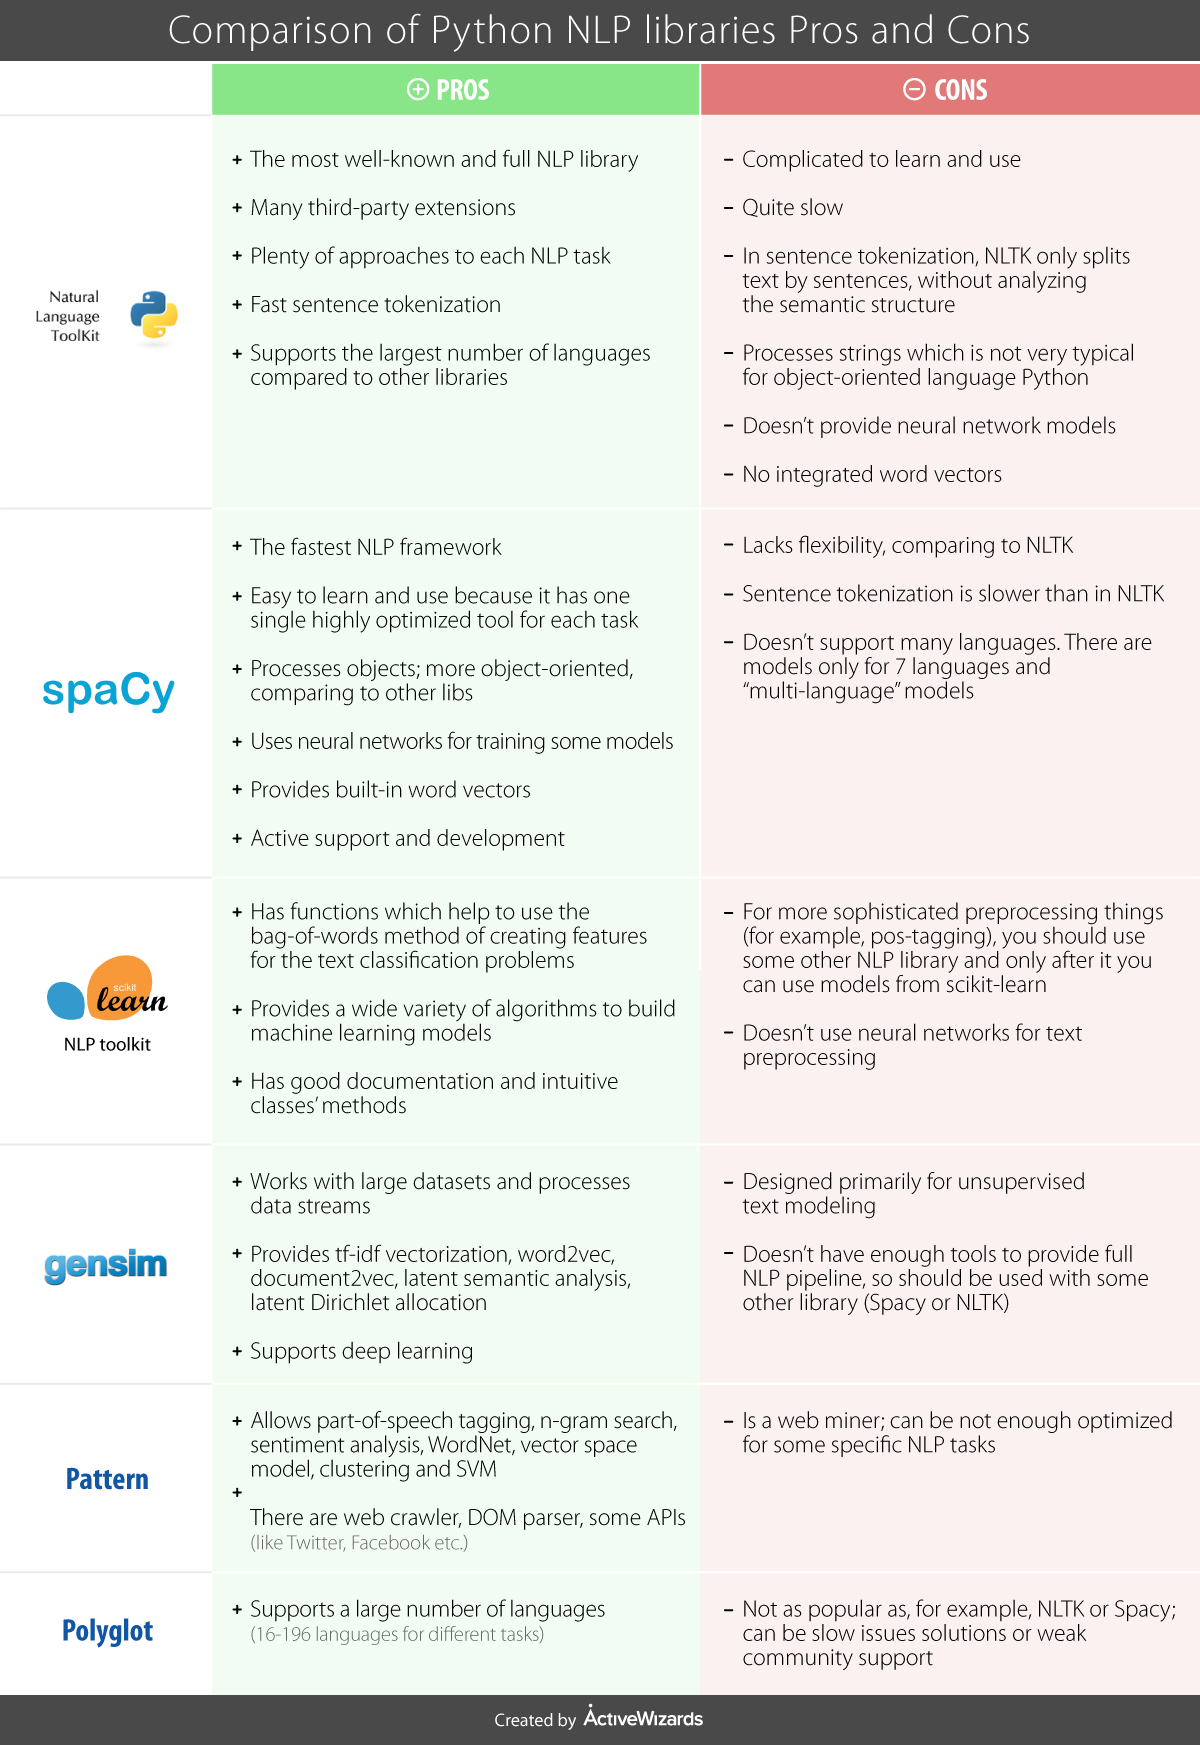

#NEW PLAN
Figure out how BERT works

- http://web.stanford.edu/class/cs224n/reports/default/15848021.pdf (bert for QA)
- https://arxiv.org/pdf/1810.04805.pdf (bert in general oh look so thats how they train it even briefly discribes how to fine tune)
- https://skymind.ai/wiki/comparison-frameworks-dl4j-tensorflow-pytorch

Ah so keras is old fashioned<br>
use transformer layer to reduce dimensonality?<br>
use [CLS] token?<br>
vs BERT Extractive, [contrasive transformer](https://github.com/travel-go/Abstractive-Text-Summarization), XLNet, ALBERT Abstractive??? (might as well ALBERT extractive amirite)


sentence embeddings using transformer-sentence library.<br>

actually a news article can be embedded as a single sentence so technically...<br>
but, i dunno.

So BERTEXT is currently the best extractor, wheares bert is the best abstractor

I dont give much care about benchmarking anymore soooo